In [1]:
import ROOT
from ROOT import gSystem, TGraph, TCanvas
import numpy as np
import matplotlib.pyplot as plt
%jsroot on

Welcome to JupyROOT 6.28/04


In [2]:
gSystem.Load('/home/krish/products/OscProb/lib/libOscProb.so')

-2

Error in <TExMap::Add>: key 140482059302928 is not unique
Error in <TExMap::Add>: key 140482059908544 is not unique
Warning in <TClassTable::Add>: class timespec already in TClassTable
Warning in <TClassTable::Add>: class reverse_iterator<__gnu_cxx::__normal_iterator<TString*,vector<TString> > > already in TClassTable
Warning in <TClassTable::Add>: class reverse_iterator<__gnu_cxx::__normal_iterator<int*,vector<int> > > already in TClassTable
Warning in <TClassTable::Add>: class reverse_iterator<__gnu_cxx::__normal_iterator<string*,vector<string> > > already in TClassTable
Warning in <TClassTable::Add>: class __gnu_cxx::__normal_iterator<char*,string> already in TClassTable
Warning in <TClassTable::Add>: class __gnu_cxx::__normal_iterator<const char*,string> already in TClassTable
Warning in <TClassTable::Add>: class __gnu_cxx::__normal_iterator<TString*,vector<TString> > already in TClassTable
Warning in <TClassTable::Add>: class __gnu_cxx::__normal_iterator<const TString*,vector<TStr

In [13]:
# Oscillation class
nsi = ROOT.OscProb.PMNS_NSI()

# paramater values
nsi.SetAngle(1, 2, 0.5831145)
nsi.SetAngle(1, 3, 0.1490511)
nsi.SetAngle(2, 3, 0.8569567)
nsi.SetDeltaMsqrs(7.41e-5, 2.4369e-3)
nsi.SetDelta(1, 3, 0)

lri_pot = 1.3 * (10**-13)

analysis_mode = 'emu'

# Earth Model - PREM
earth_model = ROOT.OscProb.PremModel('../PremTables/prem_12layers.txt')

# cosz = -0.8
earth_model.FillPath(-0.8)
nsi.SetPath(earth_model.GetNuPath())

energy_array = np.logspace(0.1, 2, 600)
prob = []

for i in energy_array:
    
    if (analysis_mode == 'emu'):
        modi_eps = lri_pot * np.array([1.,-1., 0.])
    
    elif (analysis_mode == 'etau'):
        modi_eps = lri_pot * np.array([1., 0., -1.])
    
    nsi.SetNSI(eps_ee = modi_eps[0], 
                eps_emu = 0.0,      
                eps_etau = 0.0,     
                eps_mumu = modi_eps[1],  
                eps_mutau = 0.0,     
                eps_tautau = modi_eps[2]) 

    prob.append(nsi.Prob(1, 1, i))

In [4]:
nsi.GetEps(0,0)

(1.3000000000000002e-10+0j)

In [5]:
# content of  earth model
A = earth_model.GetPremLayers()
print(A[0].density, A[0].zoa, A[0].radius)
print(len(A))

5.53000020980835 0.5 1221.5
4


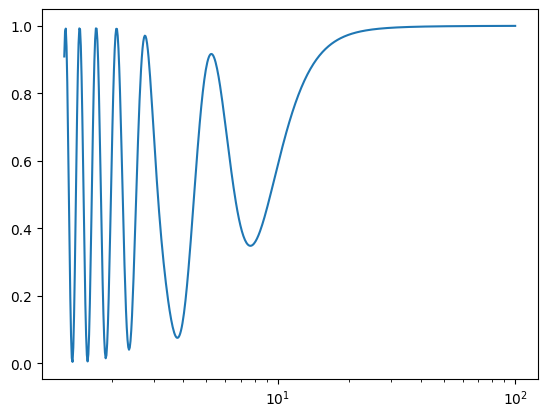

In [14]:
plt.plot(energy_array, prob)
plt.xscale('log')